In [12]:
import pandas as pd

In [13]:
# take list of csv files in ../CSVs/ and read them into a dictionary of dataframes
csv_files = !ls ../CSVs/NOWOPAMDay_456/

In [14]:
df = pd.DataFrame()

# Load file
for file in csv_files:
    df = pd.concat([df, pd.read_csv(f'../CSVs/NOWOPAMDay_456/{file}')])

In [15]:
df

,Idx,Specie,File,Validation,Suggested Specie
0,1,BottlenoseDolphin,channelA_2024-06-04_11-16-12_48kHz_124_131_0.4...,0,Ferry_Fast ferry
1,2,BottlenoseDolphin,channelA_2024-06-04_12-58-36_48kHz_55_62_0.46.WAV,0,Motor boat
2,3,BottlenoseDolphin,channelA_2024-06-05_05-38-40_48kHz_163_170_0.3...,0,WHAT?
3,4,BottlenoseDolphin,channelA_2024-06-05_10-17-42_48kHz_193_200_0.2...,0,WHAT?
4,5,BottlenoseDolphin,channelA_2024-06-05_13-12-30_48kHz_145_152_0.4...,0,Ferry_Fast ferry
...,...,...,...,...,...
38,39,StripedDolphin,channelA_2024-06-05_14-18-03_48kHz_142_149_0.3...,0,Ferry_Fast ferry
39,40,StripedDolphin,channelA_2024-06-06_15-42-31_48kHz_13_20_0.82.WAV,-1,NaN
40,41,StripedDolphin,channelA_2024-06-06_20-53-25_48kHz_190_197_0.3...,2,Bird
41,42,StripedDolphin,channelA_2024-06-06_20-53-25_48kHz_199_206_0.4...,2,Bird


In [16]:
df = df[df['Validation'] != -100]
df = df[df['Validation'] != -1]
df = df[df['Validation'] != -2]

In [17]:
# reset index
df = df.reset_index(drop=True)

In [8]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
# df['Validation'] = df['Validation'].map({1: 'Correct', 0: 'Other specie', -2: 'Unknown', 2: 'Cetacean', -1: 'Incorrect'})

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame


# Green for Correct, Orange for Bird, Red for Other specie, Blue for Unknown
colors = {'Correct': 'C2', 'Cetacean': 'C8', 'Other specie': 'C1', 'Unknown': 'C0', "Incorrect:": "C3"}

# Group by 'Specie' and 'Validation' and count occurrences
grouped = df.groupby(['Specie', 'Validation']).size().unstack(fill_value=0)

# Ensure the columns are in the correct order
grouped = grouped[['Correct', 'Other specie', 'Cetacean']]

# Plotting
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, color=[colors[val] for val in grouped.columns])
plt.title('Conteo de validaciones para Cetáceos')
plt.xlabel('Especie')
plt.ylabel('Conteo')
plt.legend(title='Validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Correct', 'Other specie', 'Cetacean'], dtype='object', name='Validation')] are in the [columns]"

In [18]:
df["Suggested Specie"].unique()

array(['Ferry_Fast ferry', 'Motor boat', 'WHAT?', nan, 'Bird',
       'Big motor boat'], dtype=object)

In [19]:
# If validation is correct, set the suggested specie is the same as the specie
df.loc[df['Validation'] == 1, 'Suggested Specie'] = df['Specie']
# if Validation is -2, set Suggested Specie to Cetacean
df.loc[df['Validation'] == 2, 'Suggested Specie'] = 'Cetacean'

In [ ]:
# # Drop rows where Validation is Unknown and Bird in df
# print(len(df))

# df = df[df.Validation != 'Unknown']
# df = df[df.Validation != 'Bird']

# print(len(df))

In [20]:
# Reset the index to ensure unique labels
df = df.reset_index(drop=True)

df["SegmentFile"] = df["File"]
df["StartSecond"] = df["File"].str.split("_").str.get(-3)
df["EndSecond"] = df["File"].str.split("_").str.get(-2)
df["ConfidenceScore"] = df["File"].str.replace(".WAV","").str.split("_").str.get(-1)
# File = File split but last 4 elements separated by _
df["File"] = df["File"].str.split('_').str[:-4].str.join('_') + ".WAV"
df

,Idx,Specie,File,Validation,Suggested Specie,SegmentFile,StartSecond,EndSecond,ConfidenceScore
0,1,BottlenoseDolphin,channelA_2024-06-04_11-16-12.WAV,0,Ferry_Fast ferry,channelA_2024-06-04_11-16-12_48kHz_124_131_0.4...,124,131,0.45
1,2,BottlenoseDolphin,channelA_2024-06-04_12-58-36.WAV,0,Motor boat,channelA_2024-06-04_12-58-36_48kHz_55_62_0.46.WAV,55,62,0.46
2,3,BottlenoseDolphin,channelA_2024-06-05_05-38-40.WAV,0,WHAT?,channelA_2024-06-05_05-38-40_48kHz_163_170_0.3...,163,170,0.33
3,4,BottlenoseDolphin,channelA_2024-06-05_10-17-42.WAV,0,WHAT?,channelA_2024-06-05_10-17-42_48kHz_193_200_0.2...,193,200,0.21
4,5,BottlenoseDolphin,channelA_2024-06-05_13-12-30.WAV,0,Ferry_Fast ferry,channelA_2024-06-05_13-12-30_48kHz_145_152_0.4...,145,152,0.42
...,...,...,...,...,...,...,...,...,...
118,38,StripedDolphin,channelA_2024-06-05_11-33-15.WAV,0,Motor boat,channelA_2024-06-05_11-33-15_48kHz_34_41_0.51.WAV,34,41,0.51
119,39,StripedDolphin,channelA_2024-06-05_14-18-03.WAV,0,Ferry_Fast ferry,channelA_2024-06-05_14-18-03_48kHz_142_149_0.3...,142,149,0.3
120,41,StripedDolphin,channelA_2024-06-06_20-53-25.WAV,2,Cetacean,channelA_2024-06-06_20-53-25_48kHz_190_197_0.3...,190,197,0.35
121,42,StripedDolphin,channelA_2024-06-06_20-53-25.WAV,2,Cetacean,channelA_2024-06-06_20-53-25_48kHz_199_206_0.4...,199,206,0.43


In [21]:
# Create column StartRecordingTimestamp from File (channelA_YYYY-MM-DD_HH-MM-SS.WAV)
df["StartRecordingTimestamp"] = df["File"].str.split('_').str.get(1) + " " + df["File"].str.split('_').str.get(2).str.replace(".WAV","")
df["StartRecordingTimestamp"] = pd.to_datetime(df["StartRecordingTimestamp"], format="%Y-%m-%d %H-%M-%S")

# Convert StartSecond and EndSecond to numeric values
df["StartSecond"] = pd.to_numeric(df["StartSecond"])
df["EndSecond"] = pd.to_numeric(df["EndSecond"])

# StartAnnotationTimestamp = StartRecordingTimestamp + StartSecond
df["StartAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["StartSecond"], unit='s')
# EndAnnotationTimestamp = StartRecordingTimestamp + EndSecond
df["EndAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["EndSecond"], unit='s')

# Order of columns: File, SegmentFile, StartSecond, EndSecond, StartRecordingTimestamp, StartAnnotationTimestamp, EndAnnotationTimestamp, Specie, Validation, Suggested Specie, ConfidenceScore
df = df[['File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Specie', 'Validation', 'Suggested Specie', 'ConfidenceScore']]
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-04_11-16-12.WAV,channelA_2024-06-04_11-16-12_48kHz_124_131_0.4...,124,131,2024-06-04 11:16:12,2024-06-04 11:18:16,2024-06-04 11:18:23,BottlenoseDolphin,0,Ferry_Fast ferry,0.45
1,channelA_2024-06-04_12-58-36.WAV,channelA_2024-06-04_12-58-36_48kHz_55_62_0.46.WAV,55,62,2024-06-04 12:58:36,2024-06-04 12:59:31,2024-06-04 12:59:38,BottlenoseDolphin,0,Motor boat,0.46
2,channelA_2024-06-05_05-38-40.WAV,channelA_2024-06-05_05-38-40_48kHz_163_170_0.3...,163,170,2024-06-05 05:38:40,2024-06-05 05:41:23,2024-06-05 05:41:30,BottlenoseDolphin,0,WHAT?,0.33
3,channelA_2024-06-05_10-17-42.WAV,channelA_2024-06-05_10-17-42_48kHz_193_200_0.2...,193,200,2024-06-05 10:17:42,2024-06-05 10:20:55,2024-06-05 10:21:02,BottlenoseDolphin,0,WHAT?,0.21
4,channelA_2024-06-05_13-12-30.WAV,channelA_2024-06-05_13-12-30_48kHz_145_152_0.4...,145,152,2024-06-05 13:12:30,2024-06-05 13:14:55,2024-06-05 13:15:02,BottlenoseDolphin,0,Ferry_Fast ferry,0.42
...,...,...,...,...,...,...,...,...,...,...,...
118,channelA_2024-06-05_11-33-15.WAV,channelA_2024-06-05_11-33-15_48kHz_34_41_0.51.WAV,34,41,2024-06-05 11:33:15,2024-06-05 11:33:49,2024-06-05 11:33:56,StripedDolphin,0,Motor boat,0.51
119,channelA_2024-06-05_14-18-03.WAV,channelA_2024-06-05_14-18-03_48kHz_142_149_0.3...,142,149,2024-06-05 14:18:03,2024-06-05 14:20:25,2024-06-05 14:20:32,StripedDolphin,0,Ferry_Fast ferry,0.3
120,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_190_197_0.3...,190,197,2024-06-06 20:53:25,2024-06-06 20:56:35,2024-06-06 20:56:42,StripedDolphin,2,Cetacean,0.35
121,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_199_206_0.4...,199,206,2024-06-06 20:53:25,2024-06-06 20:56:44,2024-06-06 20:56:51,StripedDolphin,2,Cetacean,0.43


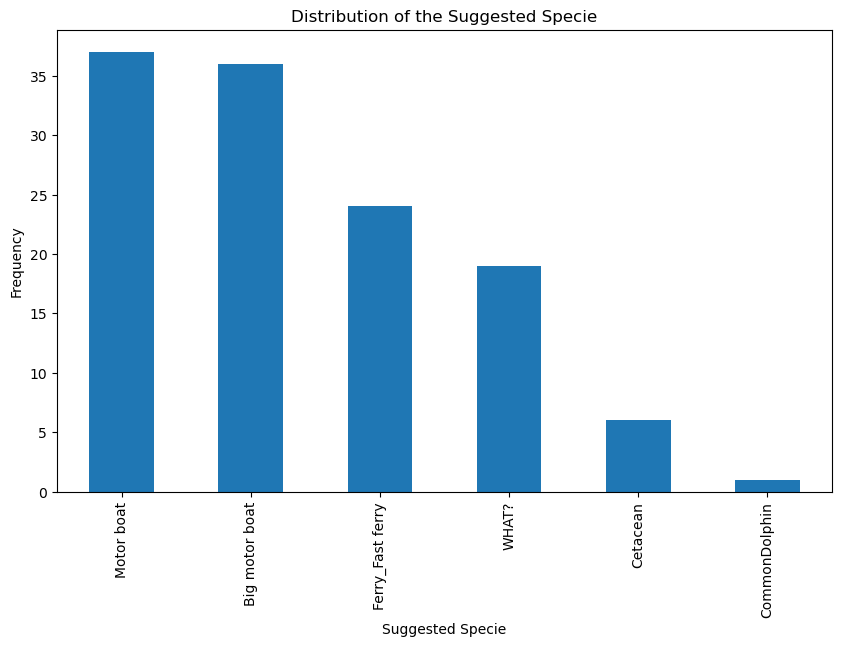

In [22]:
import matplotlib.pyplot as plt
# Distribution of the Altertative
plt.figure(figsize=(10, 6))
df['Suggested Specie'].value_counts().plot(kind='bar')
plt.xlabel('Suggested Specie')
plt.ylabel('Frequency')
plt.title('Distribution of the Suggested Specie')
plt.show()

In [23]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-04_11-16-12.WAV,channelA_2024-06-04_11-16-12_48kHz_124_131_0.4...,124,131,2024-06-04 11:16:12,2024-06-04 11:18:16,2024-06-04 11:18:23,BottlenoseDolphin,0,Ferry_Fast ferry,0.45
1,channelA_2024-06-04_12-58-36.WAV,channelA_2024-06-04_12-58-36_48kHz_55_62_0.46.WAV,55,62,2024-06-04 12:58:36,2024-06-04 12:59:31,2024-06-04 12:59:38,BottlenoseDolphin,0,Motor boat,0.46
2,channelA_2024-06-05_05-38-40.WAV,channelA_2024-06-05_05-38-40_48kHz_163_170_0.3...,163,170,2024-06-05 05:38:40,2024-06-05 05:41:23,2024-06-05 05:41:30,BottlenoseDolphin,0,WHAT?,0.33
3,channelA_2024-06-05_10-17-42.WAV,channelA_2024-06-05_10-17-42_48kHz_193_200_0.2...,193,200,2024-06-05 10:17:42,2024-06-05 10:20:55,2024-06-05 10:21:02,BottlenoseDolphin,0,WHAT?,0.21
4,channelA_2024-06-05_13-12-30.WAV,channelA_2024-06-05_13-12-30_48kHz_145_152_0.4...,145,152,2024-06-05 13:12:30,2024-06-05 13:14:55,2024-06-05 13:15:02,BottlenoseDolphin,0,Ferry_Fast ferry,0.42
...,...,...,...,...,...,...,...,...,...,...,...
118,channelA_2024-06-05_11-33-15.WAV,channelA_2024-06-05_11-33-15_48kHz_34_41_0.51.WAV,34,41,2024-06-05 11:33:15,2024-06-05 11:33:49,2024-06-05 11:33:56,StripedDolphin,0,Motor boat,0.51
119,channelA_2024-06-05_14-18-03.WAV,channelA_2024-06-05_14-18-03_48kHz_142_149_0.3...,142,149,2024-06-05 14:18:03,2024-06-05 14:20:25,2024-06-05 14:20:32,StripedDolphin,0,Ferry_Fast ferry,0.3
120,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_190_197_0.3...,190,197,2024-06-06 20:53:25,2024-06-06 20:56:35,2024-06-06 20:56:42,StripedDolphin,2,Cetacean,0.35
121,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_199_206_0.4...,199,206,2024-06-06 20:53:25,2024-06-06 20:56:44,2024-06-06 20:56:51,StripedDolphin,2,Cetacean,0.43


In [24]:
df["Suggested Specie"].unique()

array(['Ferry_Fast ferry', 'Motor boat', 'WHAT?', 'CommonDolphin',
       'Cetacean', 'Big motor boat'], dtype=object)

In [25]:
# delete rows where Suggested Specie is " "
# df = df[df['Suggested Specie'] != " "]
# delete rows with Suggestions = WHAT?
df = df[df['Suggested Specie'] != 'WHAT?']

In [26]:
df.loc[df['Suggested Specie'].isin(['Ferry_Fast ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Big motor boat']), 'Suggested Specie'] = 'Motor_boat'

In [27]:
# whistle, human_diver_1_breath, human_diver_2_wee, Ferry_FastFerry, Motor_boat
# # If CommonDolphin, KillerWhale or Cetacean, set Suggested Specie to Whistle
# df.loc[df['Suggested Specie'].isin(['CommonDolphin', 'KillerWhale', 'Cetacean']), 'Suggested Specie'] = 'Whistle'
# # If Human_diver set to Human_diver_1_breath
# df.loc[df['Suggested Specie'].isin(['Human_diver']), 'Suggested Specie'] = 'Human_diver_1_breath'
# # If Diver+wee set to Human_diver_2_wee
# df.loc[df['Suggested Specie'].isin(['Diver+wee']), 'Suggested Specie'] = 'Human_diver_2_wee'
# # If Motor boat set to Motor_boat
# df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
# # If Ferry set to Ferry_FastFerry
# df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-04_11-16-12.WAV,channelA_2024-06-04_11-16-12_48kHz_124_131_0.4...,124,131,2024-06-04 11:16:12,2024-06-04 11:18:16,2024-06-04 11:18:23,BottlenoseDolphin,0,Ferry_FastFerry,0.45
1,channelA_2024-06-04_12-58-36.WAV,channelA_2024-06-04_12-58-36_48kHz_55_62_0.46.WAV,55,62,2024-06-04 12:58:36,2024-06-04 12:59:31,2024-06-04 12:59:38,BottlenoseDolphin,0,Motor_boat,0.46
4,channelA_2024-06-05_13-12-30.WAV,channelA_2024-06-05_13-12-30_48kHz_145_152_0.4...,145,152,2024-06-05 13:12:30,2024-06-05 13:14:55,2024-06-05 13:15:02,BottlenoseDolphin,0,Ferry_FastFerry,0.42
5,channelA_2024-06-05_14-01-12.WAV,channelA_2024-06-05_14-01-12_48kHz_124_131_0.5...,124,131,2024-06-05 14:01:12,2024-06-05 14:03:16,2024-06-05 14:03:23,BottlenoseDolphin,0,Motor_boat,0.55
6,channelA_2024-06-06_14-20-07.WAV,channelA_2024-06-06_14-20-07_48kHz_232_239_0.5...,232,239,2024-06-06 14:20:07,2024-06-06 14:23:59,2024-06-06 14:24:06,BottlenoseDolphin,0,Motor_boat,0.54
...,...,...,...,...,...,...,...,...,...,...,...
118,channelA_2024-06-05_11-33-15.WAV,channelA_2024-06-05_11-33-15_48kHz_34_41_0.51.WAV,34,41,2024-06-05 11:33:15,2024-06-05 11:33:49,2024-06-05 11:33:56,StripedDolphin,0,Motor_boat,0.51
119,channelA_2024-06-05_14-18-03.WAV,channelA_2024-06-05_14-18-03_48kHz_142_149_0.3...,142,149,2024-06-05 14:18:03,2024-06-05 14:20:25,2024-06-05 14:20:32,StripedDolphin,0,Ferry_FastFerry,0.3
120,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_190_197_0.3...,190,197,2024-06-06 20:53:25,2024-06-06 20:56:35,2024-06-06 20:56:42,StripedDolphin,2,Cetacean,0.35
121,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_199_206_0.4...,199,206,2024-06-06 20:53:25,2024-06-06 20:56:44,2024-06-06 20:56:51,StripedDolphin,2,Cetacean,0.43


In [28]:
# take only Ferry_FastFerry and Motor_boat and save csv
df = df[df['Suggested Specie'].isin(['Ferry_FastFerry', 'Motor_boat'])]
# delete confidence score and specie
df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# Change Suggested Specie to Annotation
df = df.rename(columns={'Suggested Specie': 'Annotation'})
df.to_csv('../CSVs/NOWOPAMDay_456/Ferry_FastFerry_Motor_boat.csv', index=False)

In [ ]:
# delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# # save csv as wopam_day_annotations.csv
# df.to_csv('wopam_day_annotations.csv', index=False)

In [83]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-04_11-16-12.WAV,channelA_2024-06-04_11-16-12_48kHz_124_131_0.4...,124,131,2024-06-04 11:16:12,2024-06-04 11:18:16,2024-06-04 11:18:23,BottlenoseDolphin,0,Ferry_FastFerry,0.45
1,channelA_2024-06-04_12-58-36.WAV,channelA_2024-06-04_12-58-36_48kHz_55_62_0.46.WAV,55,62,2024-06-04 12:58:36,2024-06-04 12:59:31,2024-06-04 12:59:38,BottlenoseDolphin,0,Motor_boat,0.46
4,channelA_2024-06-05_13-12-30.WAV,channelA_2024-06-05_13-12-30_48kHz_145_152_0.4...,145,152,2024-06-05 13:12:30,2024-06-05 13:14:55,2024-06-05 13:15:02,BottlenoseDolphin,0,Ferry_FastFerry,0.42
5,channelA_2024-06-05_14-01-12.WAV,channelA_2024-06-05_14-01-12_48kHz_124_131_0.5...,124,131,2024-06-05 14:01:12,2024-06-05 14:03:16,2024-06-05 14:03:23,BottlenoseDolphin,0,Motor_boat,0.55
6,channelA_2024-06-06_14-20-07.WAV,channelA_2024-06-06_14-20-07_48kHz_232_239_0.5...,232,239,2024-06-06 14:20:07,2024-06-06 14:23:59,2024-06-06 14:24:06,BottlenoseDolphin,0,Motor_boat,0.54
...,...,...,...,...,...,...,...,...,...,...,...
118,channelA_2024-06-05_11-33-15.WAV,channelA_2024-06-05_11-33-15_48kHz_34_41_0.51.WAV,34,41,2024-06-05 11:33:15,2024-06-05 11:33:49,2024-06-05 11:33:56,StripedDolphin,0,Motor_boat,0.51
119,channelA_2024-06-05_14-18-03.WAV,channelA_2024-06-05_14-18-03_48kHz_142_149_0.3...,142,149,2024-06-05 14:18:03,2024-06-05 14:20:25,2024-06-05 14:20:32,StripedDolphin,0,Ferry_FastFerry,0.3
120,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_190_197_0.3...,190,197,2024-06-06 20:53:25,2024-06-06 20:56:35,2024-06-06 20:56:42,StripedDolphin,2,Cetacean,0.35
121,channelA_2024-06-06_20-53-25.WAV,channelA_2024-06-06_20-53-25_48kHz_199_206_0.4...,199,206,2024-06-06 20:53:25,2024-06-06 20:56:44,2024-06-06 20:56:51,StripedDolphin,2,Cetacean,0.43


/tmp/ipykernel_2127454/3304693427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


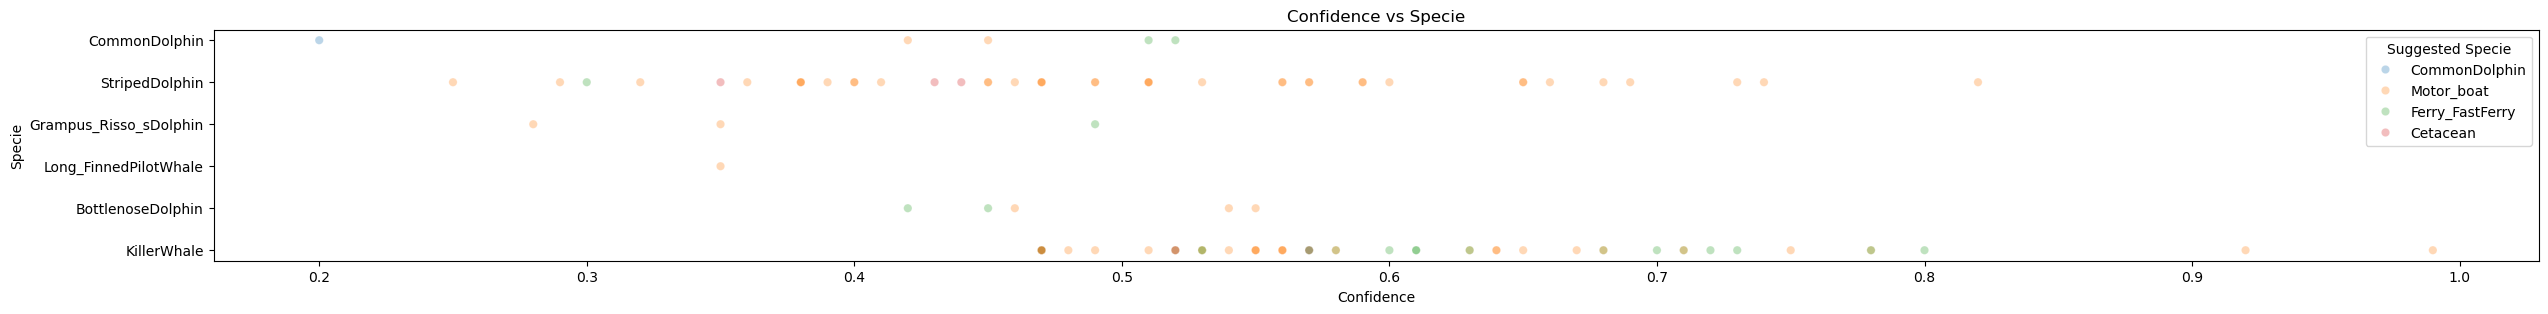

In [84]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Suggested Specie", alpha=0.3)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_2127454/4255151684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


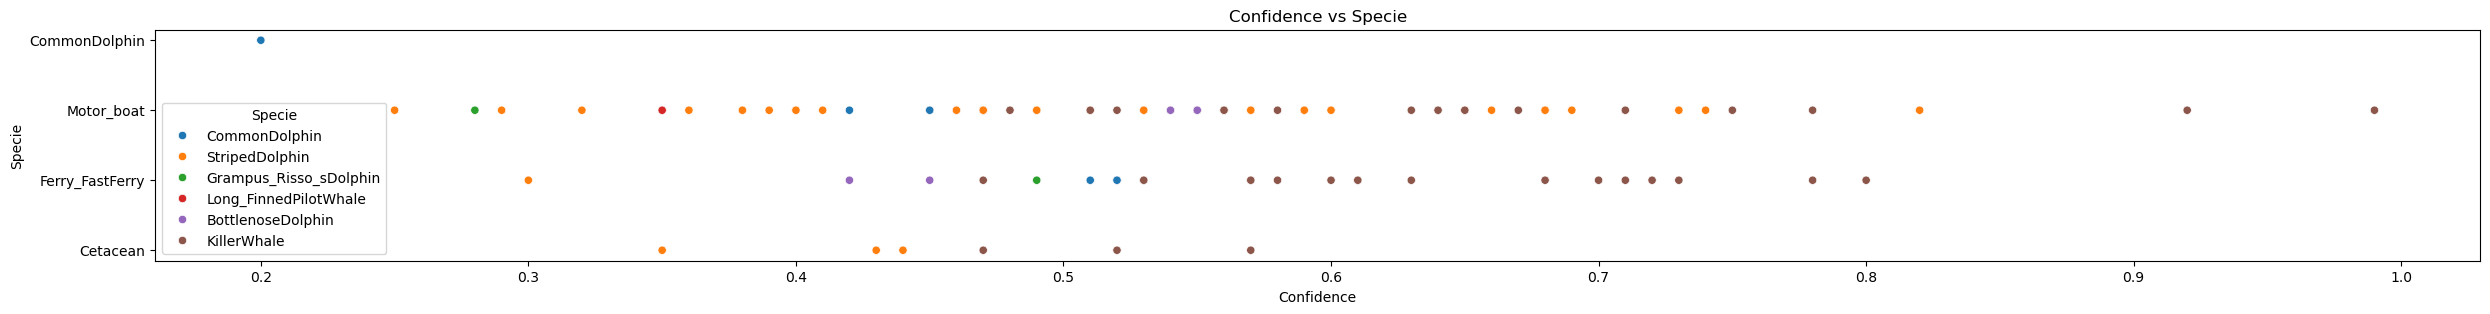

In [85]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Specie", alpha=1)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

/tmp/ipykernel_2127454/494332848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])


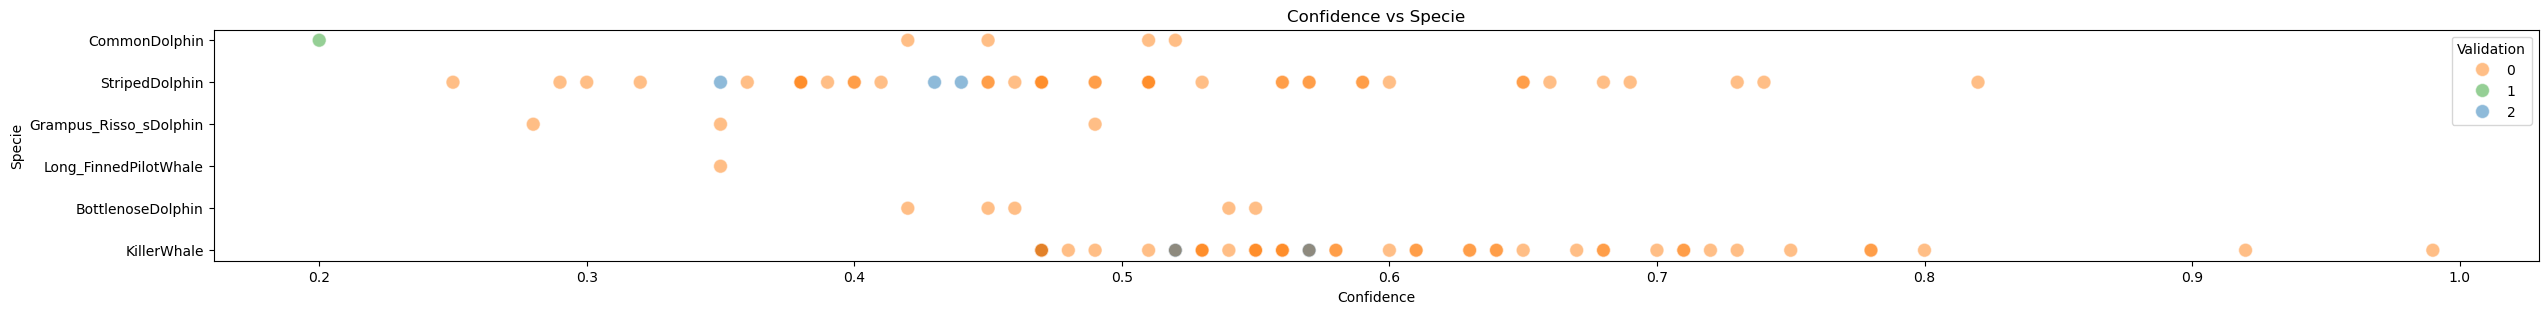

In [86]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()